<a href="https://colab.research.google.com/github/girotodenis/ReconhecimentoImagemVisaoComputacional/blob/master/Atividade1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOME COMPLETO DOS INTEGRANTES DO GRUPO:
**Davi Miranda Gonçalves**, 
**Denis SIlva Giroto**,
**Naiara Moura Pires**

MATRÍCULAS DOS INTEGRANTES DO GRUPO:
**1931143030**,
**1931143029**,
**1931143033**


In [1]:
# Clone the entire repo.
!git clone -l -s https://github.com/girotodenis/ReconhecimentoImagemVisaoComputacional.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 2), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.
/content/cloned-repo
Atividade1.ipynb  imagens  README.md


In [2]:
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import os
import numpy as np

In [3]:
execution_path = os.getcwd()
print(execution_path)

/content/cloned-repo


#Atividade 1



##Exercício 1

###a)
Crie uma função (em Python) que seja capaz de reduzir e/ou
aumentar a resolução espacial de uma imagem por um fator n, que é
um número real positivo (n>1 para um aumento da resolução
espacial e n< 1 para uma redução da resolução espacial). Tal função
deve possuir como parâmetros de entrada, o nome do arquivo da
imagem para leitua no disco e o fator n. Para aumento da resolução
utilize a técnica do vizinho-mais-próximo vista em sala de aula.

In [4]:
def resolucao(n, nome):
  
  imagem = cv2.imread('./imagens/'+nome, 0 )

  if n==0:
    return imagem
  if n<1:
    resultado = imagem[::abs(n),::abs(n)]
    
    return resultado
  else:
    resultado = np.repeat((np.repeat(imagem,n,axis=0)),n,axis=1)

    return resultado
  #for y in range(0, imagem.shape[0]):
  #  for x in range(0, imagem.shape[1]):
      #print(imagem[y, x])
      #if imagem[y, x] in [3,33,99,88,188,220]:
      #  imagem[y, x] = 0
  #return imagem[::0,::0]


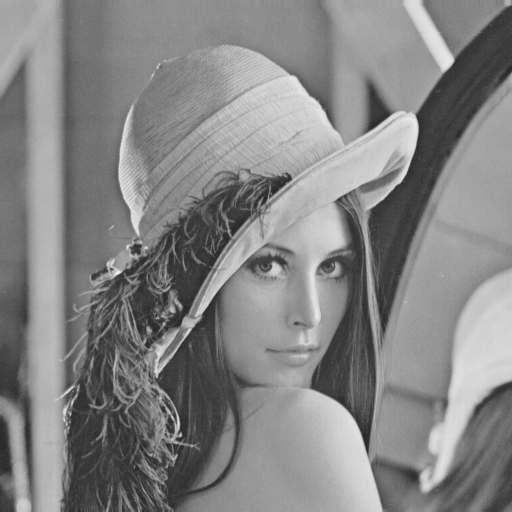

In [5]:
img = resolucao(0,'lenna.png')
cv2_imshow(img)

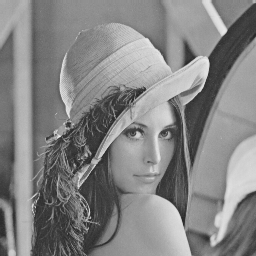

In [6]:
img = resolucao(-2,'lenna.png')
cv2_imshow(img)

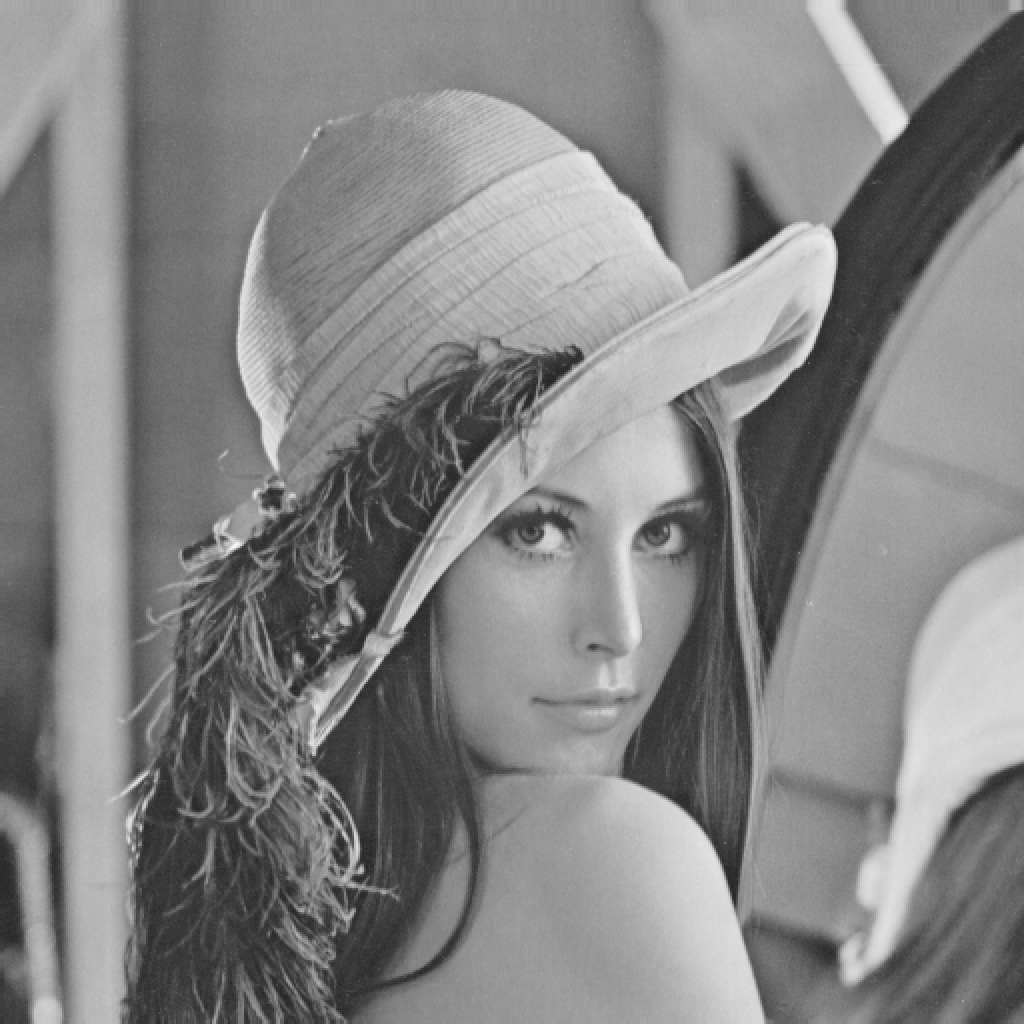

In [7]:
img = resolucao(2,'lenna.png')
cv2_imshow(img)

###b)
Utilize o sua função do item anterior para gerar imagens com
resolução espacial reduzida por fatores de 2, 4, 8 e 16. Em seguida,
utilize o seu programa novamente para aumentar estas imagens de
volta ao seu tamanho original. Há diferenças de qualidade entre estas
imagens? Comente. (Obs.: Plote os resultados para que possam se
visualizados).

####Resposta
Há diferenças

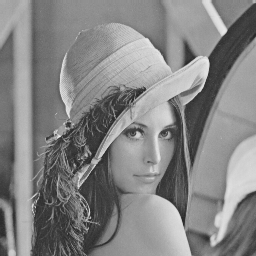

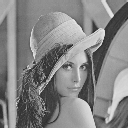

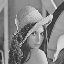

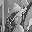

In [8]:
img = resolucao(-2,'lenna.png')
cv2.imwrite("./imagens/lenna_2menos.png", img) 
cv2_imshow(img)  
img = resolucao(-4,'lenna.png')
cv2.imwrite("./imagens/lenna_4menos.png", img)  
cv2_imshow(img) 
img = resolucao(-8,'lenna.png')
cv2.imwrite("./imagens/lenna_8menos.png", img)  
cv2_imshow(img) 
img = resolucao(-16,'lenna.png')
cv2.imwrite("./imagens/lenna_16menos.png", img)
cv2_imshow(img) 

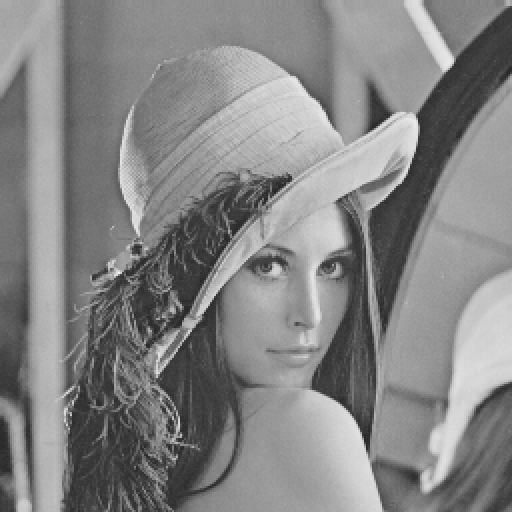

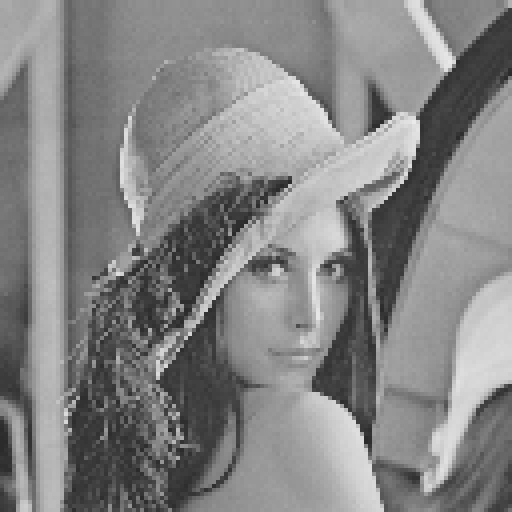

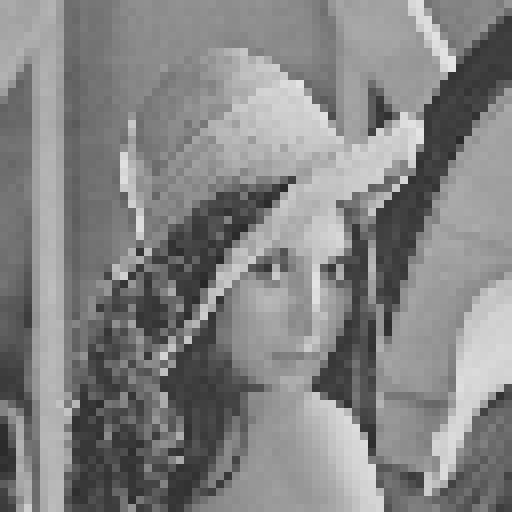

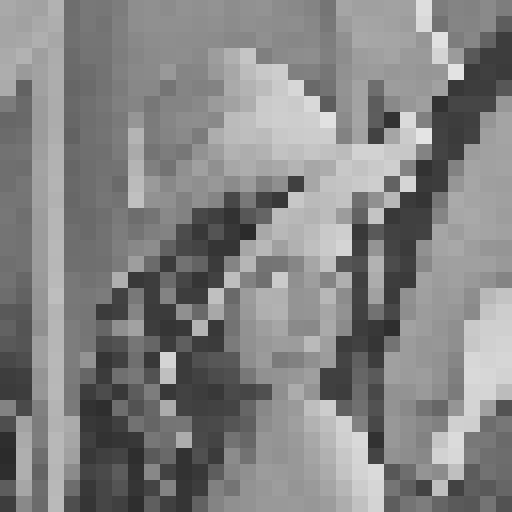

In [9]:
img = resolucao(2,'lenna_2menos.png')
cv2.imwrite("./imagens/lenna_2mais.png", img) 
cv2_imshow(img)  
img = resolucao(4,'lenna_4menos.png')
cv2.imwrite("./imagens/lenna_4mais.png", img)
cv2_imshow(img)   
img = resolucao(8,'lenna_8menos.png')
cv2.imwrite("./imagens/lenna_8mais.png", img)
cv2_imshow(img)   
img = resolucao(16,'lenna_16menos.png')
cv2.imwrite("./imagens/lenna_16menos.png", img)
cv2_imshow(img) 
 

###c)
Modifique a função desenvolvida em (a), de forma que seja
utilizada a técnica de interpolação bilinear e refaça o que se
pede no item (b) novamente. (Obs.: Plote os resultados para
que possam se visualizados).

In [18]:
import numpy as np
from scipy import ndimage
from math import floor, ceil
 
def bilinear_pixel(imArr, posX, posY):
    out = []
    
    modXi = int(posX)
    modYi = int(posY)
    modXiPlusOneLim=min(modXi+1,imArr.shape[1]-1)
    modYiPlusOneLim=min(modYi+1,imArr.shape[0]-1)

    dx = posX-modXi
    dy = posY-modYi

    for chan in range(imArr.shape[2]):
        a = imArr[modYi,modXi,chan]
        b = imArr[modYi,modXiPlusOneLim,chan]
        c = imArr[modYiPlusOneLim,modXi,chan]
        d = imArr[modYiPlusOneLim,modXiPlusOneLim,chan]
        
        res = (1-dx)*(1-dy)*a+dx*(1-dy)*b+(1-dx)*dy*c+dx*dy*d
        out.append(int(res))

    return out
 

def resolucao_bilinear(nome, fator_n):  
  im = cv2.imread('./imagens/' + nome)

  #Aumentando ou diminuindo o Array(resize)
  if fator_n == 0:
    return im
  elif fator_n < 0:
    fator_n *= -1
    resizedShape = list(map(int, [im.shape[0] / fator_n, im.shape[1] / fator_n, im.shape[2]]))
  else:
    resizedShape = list(map(int, [im.shape[0] * fator_n, im.shape[1] * fator_n, im.shape[2]]))

  resizedImg = np.empty(resizedShape, dtype=np.uint8)
  rowScale = float(im.shape[0]) / float(resizedImg.shape[0])
  colScale = float(im.shape[1]) / float(resizedImg.shape[1])

  for row in range(resizedImg.shape[0]):
    for col in range(resizedImg.shape[1]):
      row_original = row * rowScale
      col_original = col * colScale
      resizedImg[row, col] = bilinear_pixel(im, col_original, row_original)

  return resizedImg


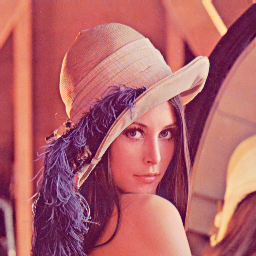

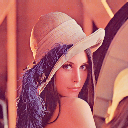

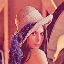

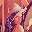

In [19]:
img = resolucao_bilinear('lenna.png', -2)
cv2.imwrite('./imagens/' + "lenna_2menos.png", img) 
cv2_imshow(img)  
img = resolucao_bilinear('lenna.png', -4)
cv2.imwrite('./imagens/' + "lenna_4menos.png", img)  
cv2_imshow(img) 
img = resolucao_bilinear('lenna.png', -8)
cv2.imwrite('./imagens/' + "lenna_8menos.png", img)  
cv2_imshow(img) 
img = resolucao_bilinear('lenna.png', -16)
cv2.imwrite('./imagens/' + "lenna_16menos.png", img)
cv2_imshow(img)

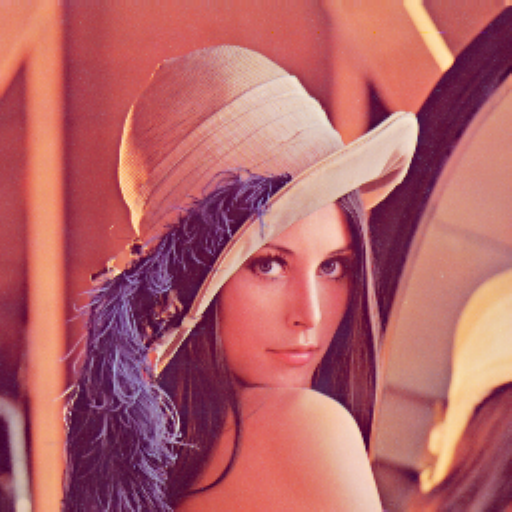

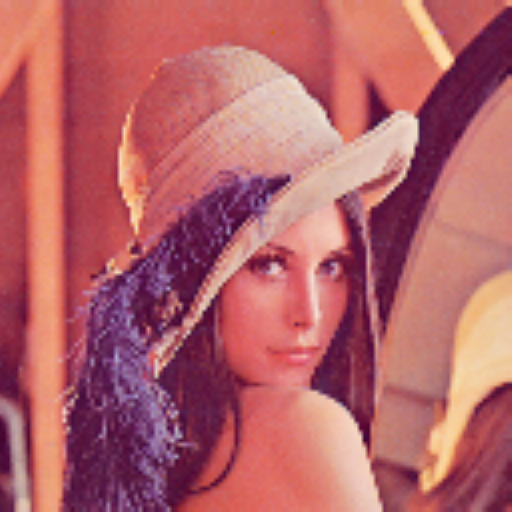

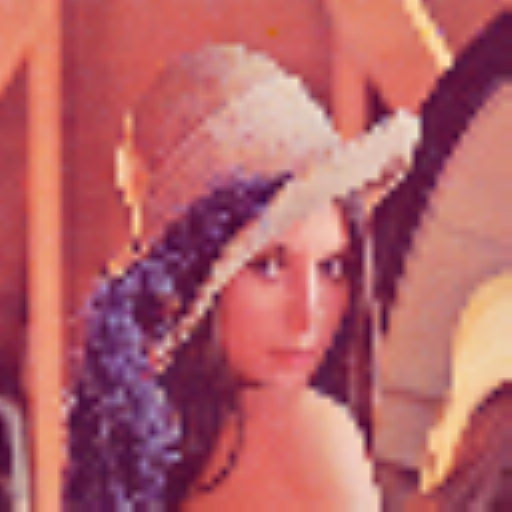

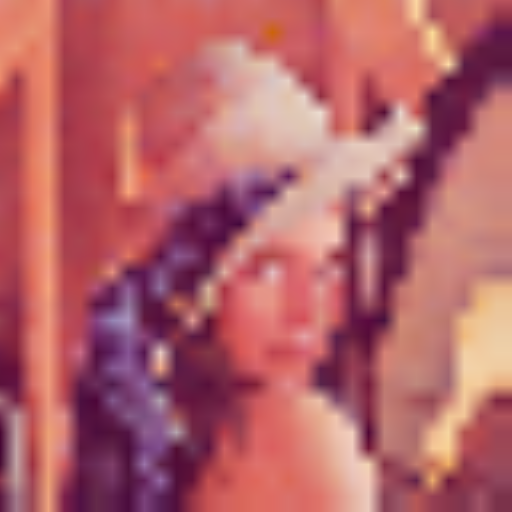

In [15]:
img = resolucao_bilinear('lenna_2menos.png', 2)
cv2_imshow(img)  
img = resolucao_bilinear('lenna_4menos.png', 4)
cv2_imshow(img) 
img = resolucao_bilinear('lenna_8menos.png', 8)
cv2_imshow(img) 
img = resolucao_bilinear('lenna_16menos.png', 16)
cv2_imshow(img)

##Exercício 2

###a)

Escreva uma função que realize a filtragem espacial de uma imagem. Essa função
terá 2 parâmetros de entrada: a imagem a ser transformada e o filtro a ser utilizado.

###b)

Aplique os filtros abaixo na imagem da Lena (que foi enviada com o trabalho).
Compare os resultados obtidos para cada um dos filtros. Com base nestes resultados,
qual o tipo de filtro (passa-alta, passa-baixa, passa-faixa, etc.) que está sendo utilizado
em cada caso e qual o efeito de cada filtro na imagem.

###c)

O filtro 1 possui tamanho 3x3. O que aconteceria se aumentássemos o tamanho do
filtro para 11x11, 17x17 ou 35x35? De que forma o tamanho do filtro afeta a imagem?